Step #1: Installing the Necessary Libraries

In [1246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step #2: download dataset
Step #3: Import and Checking the Dataset

In [1247]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Step #4: Simple Exploratory Data Analysis

<BarContainer object of 6 artists>

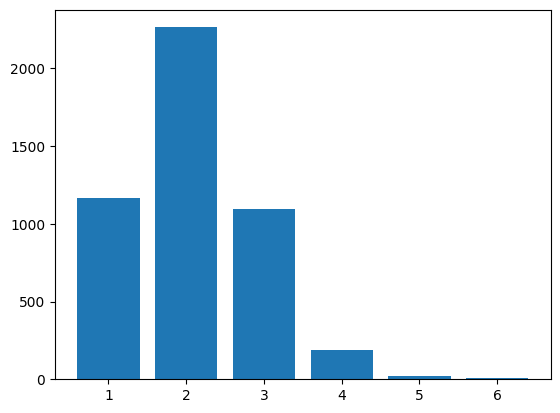

In [1248]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

C:\Users\User\AppData\Local\Temp\ipykernel_2200\2085740626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

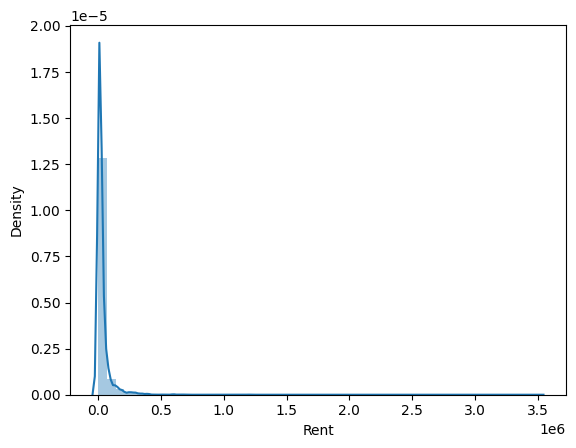

In [1249]:
sns.distplot(data['Rent'])


C:\Users\User\AppData\Local\Temp\ipykernel_2200\694979484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

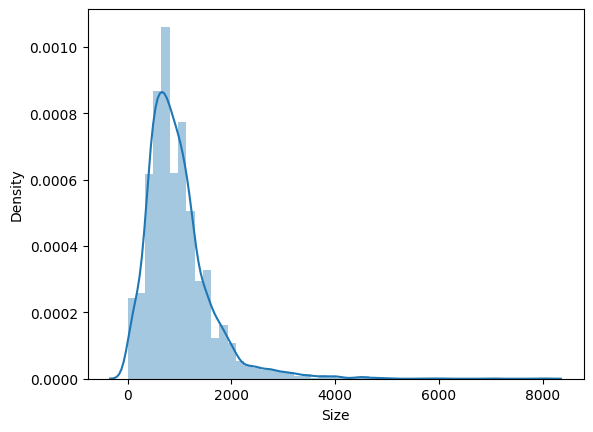

In [1250]:
sns.distplot(data['Size'])


In [1251]:
data['Floor'].value_counts()


Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [1252]:
data['Furnishing Status'].value_counts()


Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [1253]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

Cleaning a bit

In [1254]:
# Function to update the Floor values to number value
def update_floor_value(value):
    if 'Ground' in value:
        return value.replace('Ground', '1')
    elif 'Upper Basement' in value:
        return None  # Return None to drop the row
    elif 'Lower Basement' in value:
        return None  # Return None to drop the row
    else:
        return value
    
data['Floor'] = data['Floor'].apply(update_floor_value)

# Drop rows with None values in the 'Floor' column
data.dropna(subset=['Floor'], inplace=True)

In [1255]:
# Function to check if left value is greater than right. drop if not
def check_greater_left_value(row):
    if " out of " in row:
        test = row.split(" out of ")
        if int(test[0]) > int(test[1]):
            print(test)
            row = "{} out of {}".format(test[1], test[0])
            return row
        else:
            return row
    else:
        return row
    
data['Floor'] = data['Floor'].apply(check_greater_left_value)

['8', '5']
['2', '1']


In [1256]:
# Function to extract total floors 
def extract_total_floors(floor):
    if 'out of' in floor:
        return int(floor.split('out of')[-1].strip())
    else:
        return int(floor)

# Apply the function to create the 'Total Floors' column
data['Total Floors'] = data['Floor'].apply(extract_total_floors)


In [1257]:
# type of building
# Low-rise buildings are defined as buildings with 4 floors or under.
# Mid-rise buildings are defined as buildings that have between 5 to 12 floors.
# High-rise buildings are defined as buildings that have 13 floors or above.
# Skyscrapers are buildings with over 40 floors and are considered part of the high-rise category. 

# Function to determine the type of building
def determine_building_type(total_floors):
    if total_floors <= 4:
        return 'Low-rise'
    elif 5 <= total_floors <= 12:
        return 'Mid-rise'
    elif total_floors >= 13:
        if total_floors > 40:
            return 'Skyscrapers'
        else:
            return 'High-rise'
        
data['Type of Building'] = data['Total Floors'].apply(determine_building_type)

In [1258]:
# Get value counts of each area locality
value_counts = data['Area Locality'].value_counts()

# Create a dictionary to map each area locality to its count
locality_counts = dict(zip(value_counts.index, value_counts.values))

# Map the counts to the 'Area Locality' column to create the 'Area Locality Popularity' column
data['Area Locality Popularity'] = data['Area Locality'].map(locality_counts)


In [1259]:
# Convert the fractions to decimal values
def convert_to_decimal(value):
    parts = value.split(' out of ')
    if len(parts) == 2:
        numerator = float(parts[0])
        denominator = float(parts[1])
        return numerator / denominator
    else:
        return value

# Apply the conversion function to the 'Floor' column
data['Floor'] = data['Floor'].apply(convert_to_decimal)
data['Floor'] = pd.to_numeric(data['Floor'], errors='coerce')


Step #5: Preprocessing (Encoding)

In [1260]:
data = data[['BHK', 
             'Size',
             'Bathroom',
             'Floor',
             'Total Floors',
             'Area Locality Popularity', 
             'Type of Building',
             'Area Type',
             'City',
             'Furnishing Status',
             'Tenant Preferred', 
             'Point of Contact', 
             'Rent'
             ]]

In [1261]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [1262]:

data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Type of Building')
data = one_hot_encode(data, 'Tenant Preferred')
data = one_hot_encode(data, 'Point of Contact')
data

,BHK,Size,Bathroom,Floor,Total Floors,Area Locality Popularity,Rent,Carpet Area,Super Area,Chennai,...,Mumbai,Semi-Furnished,Unfurnished,Low-rise,Mid-rise,Skyscrapers,Bachelors/Family,Family,Contact Builder,Contact Owner
0,2,1100,2,0.500000,2,2,10000,False,True,False,...,False,False,True,True,False,False,True,False,False,True
1,2,800,1,0.333333,3,2,20000,False,True,False,...,False,True,False,True,False,False,True,False,False,True
2,2,1000,1,0.333333,3,16,17000,False,True,False,...,False,True,False,True,False,False,True,False,False,True
3,2,800,1,0.500000,2,2,10000,False,True,False,...,False,False,True,True,False,False,True,False,False,True
4,2,850,1,0.500000,2,1,7500,True,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,0.600000,5,2,15000,True,False,False,...,False,True,False,False,True,False,True,False,False,True
4742,3,2000,3,0.250000,4,1,29000,False,True,False,...,False,True,False,True,False,False,True,False,False,True
4743,3,1750,3,0.600000,5,9,35000,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4744,3,1500,2,0.676471,34,29,45000,True,False,False,...,False,True,False,False,False,False,False,True,False,False


In [1263]:
# Define the lower and upper bounds for outlier detection
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using boolean indexing
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Remove outliers
data = data[~outliers]

Step #5: Preprocessing (Training and Test Split)

In [1264]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [1265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

Step #5: Preprocessing (Standardization)

In [1266]:
from sklearn.preprocessing import PolynomialFeatures

sc = PolynomialFeatures()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step #6: Modelling

In [1267]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
# Test a variety of penalty value using Ridge Cross-Validation to find the most suitable alpha value
alphas = [30, 20, 10, 15, 25, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 175, 200, 225, 250, 275, 300, 400, 500]
sample_model = RidgeCV(alphas=alphas, store_cv_values=True)
sample_model.fit(X_train, y_train)
optimal_alpha = sample_model.alpha_
print(optimal_alpha)

# model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=optimal_alpha)
model.fit(X_train, y_train)

print(f"Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Regression-Test set score: {model.score(X_test, y_test):.2f}")

40
Regression-Training set score: 0.76
Regression-Test set score: 0.74


Step #7: Evaluation

In [1268]:
### Quantitative Evaluation
y_preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 0.00000000e+00  7.14930725e+02  1.56744798e+01  8.95409602e+02
 -1.80824004e+02  4.82642997e+02 -4.02758425e+02 -1.82811386e-01
 -3.47717310e+00  5.91324254e+02  3.16972312e+02 -4.84906893e+02
 -4.62964200e+02  1.53887767e+03 -5.76498045e+02 -7.59523892e+02
 -6.77558163e+02  1.01191510e+02 -1.13213963e+02  4.17873390e+02
 -2.64382317e+02  0.00000000e+00 -4.29853830e+02 -1.82552134e+02
 -1.31683179e+00  1.75984058e+03  1.66897561e+01 -5.92203073e+01
 -3.13062934e+01  4.60021733e+02  2.54887015e+02  3.06731890e+02
  3.37221432e+02 -9.13006345e+01  5.09152984e+01 -1.35368164e+02
  9.67258353e+02  8.95080203e+02  5.94213129e+02 -4.78724770e+02
 -2.79797386e+02 -7.70209492e+02 -8.17780483e+02  0.00000000e+00
 -6.13444647e+01  2.25165640e-03 -6.01606943e-01  1.29082464e+00
  7.59165526e-02  1.57465907e-01  2.10936073e+00  2.57684678e+00
 -1.85710349e+00 -3.75147554e+00 -5.01360652e+00 -1.06705998e+00
  2.09205476e+01 -3.44502602e+00 -3.36670656e+00 -6.49666617e+00
 -2.59363

In [1269]:
### Qualitative Evaluation
sample_data = X.iloc[0]

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_standardized

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.00e+00, 2.00e+00, 1.10e+03, 2.00e+00, 5.00e-01, 2.00e+00,
        2.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 4.00e+00,
        2.20e+03, 4.00e+00, 1.00e+00, 4.00e+00, 4.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.21e+06, 2.20e+03, 5.50e+02,
        2.20e+03, 2.20e+03, 0.00e+00, 1.10e+03, 0.00e+00, 0.00e+00,
        0.00e+00, 1.10e+03, 0.00e+00, 0.00e+00, 1.10e+03, 1.10e+03,
        0.00e+00, 0.00e+00, 1.10e+03, 0.00e+00, 0.00e+00, 1.10e+03,
        4.00e+00, 1.00e+00, 4.00e+00, 4.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 2.00e+00, 2.50e-01, 1.00e+00, 

In [1270]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

12716.713063050318

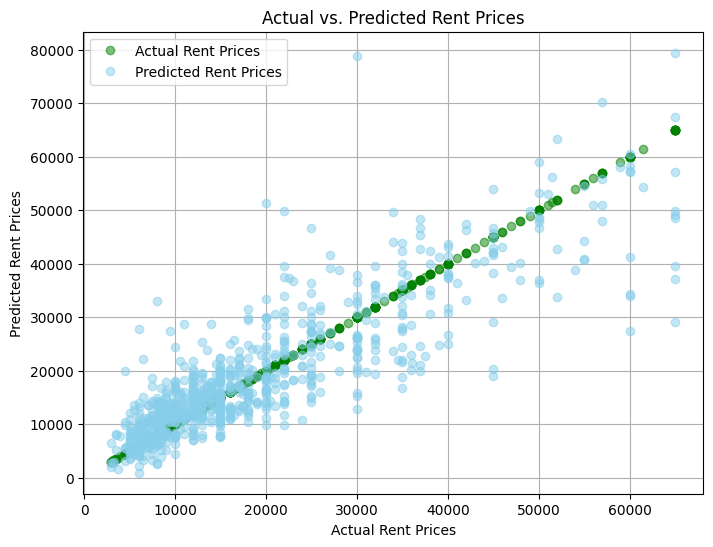

In [1271]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()